In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from plotter import P_over_E_parameter
from events import list_of_params
from functions import ic_params

In [8]:
E_range = np.logspace(np.log10(500),4,100)
params = ic_params.copy()
anti=True
params.update({'theta_14': np.arcsin(np.sqrt(0.02)), 'theta_24': np.arcsin(np.sqrt(0.032)), 'dm_41':0.62, 'e_mm': -0.7, 'e_tt': -0.5, 'e_ss':6})
params = [params]
zenith = -1

Pmm_nsi = P_over_E_parameter('m',params,E=E_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
Pmm = P_over_E_parameter('m',params,E=E_range, ndim=4, nsi=False,anti=anti,zenith=zenith)
Pmm_3gen = P_over_E_parameter('m',params,E=E_range, ndim=3, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)

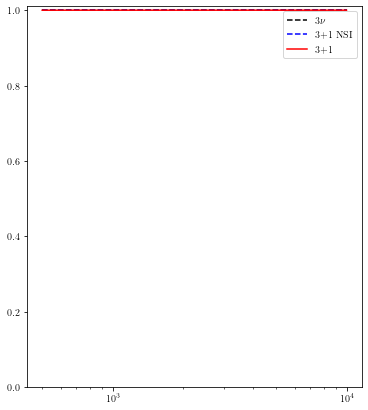

In [3]:
fig, ax = plt.subplots(1, figsize=(6,7))
plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
plt.plot(E_range, Pmm_nsi, label='3+1 NSI', ls='dashed', c='blue')
plt.plot(E_range, Pmm, label='3+1',c='red')
plt.xscale('log')
plt.ylim((0,1.01))
plt.legend()


In [2]:
from plotter import oscillogram

In [3]:
z_range = np.linspace(-1,0,50)
E_range = np.logspace(2,5,100)
params = ic_params.copy()
params.update({'theta_14': np.arcsin(np.sqrt(0)), 'theta_24': np.arcsin(np.sqrt(0.07))/2, 'dm_41':1.3})
P= oscillogram(E_range, z_range, params, nsi=False)

<ipython-input-14-17800e2625e8>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c=ax.pcolormesh(z_range, E_range,P.T,cmap='Blues_r',edgecolor=None)


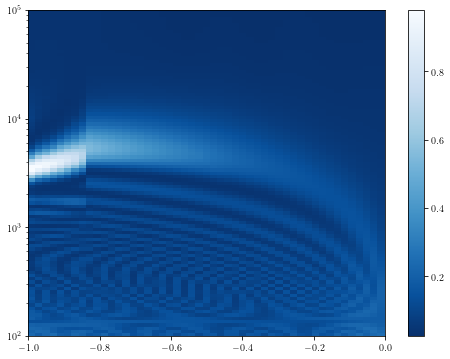

In [14]:
fig, ax = plt.subplots(1, figsize=(8,6))
c=ax.pcolormesh(z_range, E_range,P.T,cmap='Blues_r',edgecolor=None)
ax.set_yscale('log')
fig.colorbar(c, ax=ax)